# Car price prediction with Nigeria dataset (Jiji) Using Machine Learning Algorithms.

## 1. Data Collection 

#### The dataset used in this project was obtained from a popular online marketplace Jiji (https://jiji.ng/cars).
Jiji is a website in Africa that connects consumers and sellers so they can exchange goods and services.
The website was scraped beautifulsoup, and saves as `new_scrape.csv` in CSV format.

## 2. Data Preprocessing 
**Performing data cleaning**

In [1]:
# required libraries and pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("../dataset/new_scrape.csv")

In [3]:
# take a look of the data
print("Shape: ", df.shape)
df.head()

Shape:  (5122, 30)


,Name,Price,Market price,Location,Thumbnail,Images,Gear,Odometer,Fuel type,Car condition,...,Engine Size,Number of Cylinders,Horse Power,Color,Seats,Registered Car,Exchange Possible,VIN Chassis number,Mileage,VIN number
0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",https://pictures-nigeria.jijistatic.com/112155...,https://pictures-nigeria.jijistatic.com/112155...,Automatic,NaN,Petrol,Foreign Used,...,2700 cc,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN
1,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",https://pictures-nigeria.jijistatic.com/113346...,https://pictures-nigeria.jijistatic.com/113346...,Automatic,NaN,Petrol,Foreign Used,...,4600 cc,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN
2,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",https://pictures-nigeria.jijistatic.com/107470...,https://pictures-nigeria.jijistatic.com/107470...,Automatic,75000 km,Petrol,Foreign Used,...,3700 cc,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN
3,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",https://pictures-nigeria.jijistatic.com/912612...,https://pictures-nigeria.jijistatic.com/912612...,Automatic,NaN,Petrol,Foreign Used,...,1800 cc,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN
4,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",https://pictures-nigeria.jijistatic.com/111479...,https://pictures-nigeria.jijistatic.com/111479...,Automatic,70431 km,Petrol,Foreign Used,...,3500 cc,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN


In [4]:
# rename column name to snake case
df.columns = [column.lower().replace(" ", "_") for column in df.columns]

In [5]:
# check the percentage of null values
# 100 * df.isnull().sum() / len(df)

In [6]:
# let calculate and show the percentage of the missing data
def null_value_percentage(df):
    percent_missing = 100 * df.isnull().sum() / len(df)
    percent_missing = percent_missing[percent_missing > 0].sort_values()
    return percent_missing


In [7]:
null_value_percentage = null_value_percentage(df)

In [8]:
### The last three features has the highest percentage of missing data
print(null_value_percentage)

location                0.488091
gear                    0.488091
color                   0.488091
car_condition           0.488091
year_of_manufacture     0.488091
make                    0.488091
model                   0.488091
second_condition        0.546661
market_price           15.599375
registered_car         18.156970
trim                   36.157751
number_of_cylinders    40.003905
body                   40.960562
drivetrain             42.737212
fuel_type              42.737212
seats                  43.010543
engine_size            43.459586
horse_power            46.075752
odometer               51.210465
other_features         69.875049
exchange_possible      73.975010
vin_chassis_number     96.583366
vin_number             99.902382
mileage                99.921906
dtype: float64


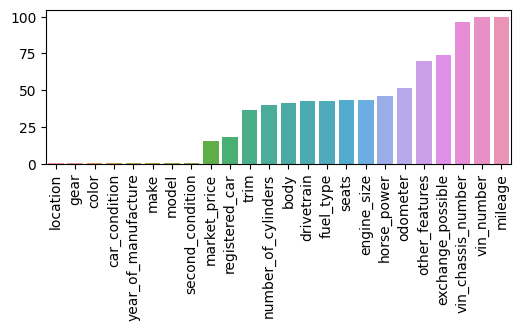

In [9]:
# bar chart to show the percentage of missing data
plt.figure(figsize=(6, 2))
sns.barplot(x=null_value_percentage.index, y=null_value_percentage)
plt.xticks(rotation=90);

In [10]:
# plt.figure(figsize=(6, 2))
# sns.barplot(x=null_value_percentage.index, y=null_value_percentage)
# plt.xticks(rotation=90);
# plt.ylim((0,1))

In [11]:
# 100 / len(df)

### Since, all the media data and the links are not applicable here, we remove them
*There is no need for the car images, thumbnail and page link. So, let's drop them.*

In [12]:
df = df.drop(["thumbnail", "images", "page_link"], axis=1)

### Cleaning the *price* column to extract the price digit. 

In [13]:
# extract digit out from the price column
def clean_price(price):
    new_price = ''.join(price.split()[1].split(','))
    return float(new_price)

In [14]:
# plt.figure(figsize=(8, 4))
df["actual_price"] = df["price"].apply(clean_price)

In [15]:
df.columns

Index(['name', 'price', 'market_price', 'location', 'gear', 'odometer',
       'fuel_type', 'car_condition', 'other_features', 'dealer_name',
       'second_condition', 'make', 'model', 'year_of_manufacture', 'trim',
       'body', 'drivetrain', 'engine_size', 'number_of_cylinders',
       'horse_power', 'color', 'seats', 'registered_car', 'exchange_possible',
       'vin_chassis_number', 'mileage', 'vin_number', 'actual_price'],
      dtype='object')

### Check the location that has the highest car

In [16]:
location_count = df.groupby('location')['price'].count().sort_values()

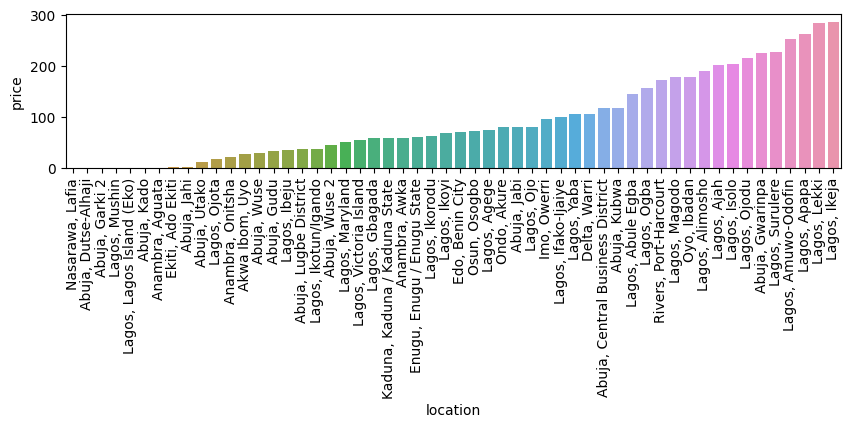

In [17]:
# bar plot
plt.figure(figsize=(10, 2), dpi=100)
sns.barplot(x=location_count.index, y=location_count)
plt.xticks(rotation=90);

In [18]:

# def get_market_price_range(market_price: str) -> tuple:
#     # print("Market Price: ", market_price, type(market_price))

#     if isinstance(market_price, str):
        
#         if "₦" in market_price:
#             market_price = market_price.replace("₦", "").split("~")
            
#         # print(market_price)
            
#         for index, price in enumerate(market_price):
#             price = price.strip()
#             if "K" in price:
#                 price = price.replace("K", "").strip()
#                 market_price[index] = float(price) * 1000
#             elif "M" in price:
#                 price = price.replace("M", "").strip()
#                 market_price[index] = float(price) * 1000000
                
                
#         return market_price

#     return market_price


In [19]:
'₦ 13.48 M ~ 14.5 M'.split("~")[1].strip()[:-1].strip()

'14.5'

In [20]:

def get_market_price_range(market_prices):
    
    lower_market_price = []
    higher_market_price = []
    
    for price in market_prices:
        
        if not isinstance(price, str):
            lower_market_price.append(np.nan)
            higher_market_price.append(np.nan)
            continue

        lower, higher = price.split("~")  
            
        lower_market_price.append(float(lower.strip()[1:-1].strip()) * 1000000 
                                  if lower.strip().endswith("M") 
                                  else float(lower.strip()[1:-1].strip())* 1000)
        higher_market_price.append(float(higher.strip()[:-1].strip()) * 1000000
                                  if higher.strip().endswith("M") 
                                  else float(higher.strip()[1:-1].strip())* 1000)
        
    return lower_market_price, higher_market_price
      
    

In [21]:
# for i in df["market_price"]:
#     print(i)

In [22]:
# df[["lower_market_price", "lower_market_price"]] = df["market_price"].apply(get_market_price_range)

lower_market_price, higher_market_price = get_market_price_range(df["market_price"])

In [23]:
len(lower_market_price)

5122

In [24]:
len(higher_market_price)

5122

In [25]:
# columns for lower_market_price and higher_market_price
df2 = pd.DataFrame(list(zip(lower_market_price, higher_market_price)), columns =["lower_market_price", "higher_market_price"])

In [26]:
df2

,lower_market_price,higher_market_price
0,13480000.0,14500000.0
1,17500000.0,18500000.0
2,6500000.0,7100000.0
3,4800000.0,5240000.0
4,13500000.0,13900000.0
...,...,...
5117,4700000.0,4800000.0
5118,4470000.0,4600000.0
5119,17500000.0,18500000.0
5120,12440000.0,13060000.0


In [27]:
# combine the 2 dataframes
df = pd.concat([df2, df], axis=1)
df

,lower_market_price,higher_market_price,name,price,market_price,location,gear,odometer,fuel_type,car_condition,...,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number,actual_price
0,13480000.0,14500000.0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,...,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN,8800000.0
1,17500000.0,18500000.0,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,...,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN,19500000.0
2,6500000.0,7100000.0,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,...,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN,7500000.0
3,4800000.0,5240000.0,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,...,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN,4800000.0
4,13500000.0,13900000.0,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,...,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN,13500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,4700000.0,4800000.0,Ford Explorer 2013 Blue,"₦ 4,200,000",₦ 4.7 M ~ 4.8 M,"Lagos, Agege",Automatic,NaN,NaN,Nigerian Used,...,NaN,NaN,Blue,NaN,Yes,NaN,NaN,NaN,NaN,4200000.0
5118,4470000.0,4600000.0,Toyota RAV4 2.5 Sport 4x4 2011 Gray,"₦ 4,650,000,",₦ 4.47 M ~ 4.6 M,"Lagos, Ajah",Automatic,NaN,Petrol,Nigerian Used,...,4.0,NaN,Gray,5,NaN,NaN,NaN,NaN,NaN,4650000.0
5119,17500000.0,18500000.0,Lexus GX 460 2010 Black,"₦ 10,200,000",₦ 17.5 M ~ 18.5 M,"Lagos, Ajah",Automatic,80000 km,Petrol,Foreign Used,...,8.0,305 hp,Black,7,No,NaN,NaN,NaN,NaN,10200000.0
5120,12440000.0,13060000.0,Lexus ES 350 FWD 2014 Black,"₦ 12,850,000,",₦ 12.44 M ~ 13.06 M,"Lagos, Ikeja",Automatic,NaN,Petrol,Foreign Used,...,6.0,268 hp,Black,5,No,No,NaN,NaN,NaN,12850000.0


In [28]:
df.columns

Index(['lower_market_price', 'higher_market_price', 'name', 'price',
       'market_price', 'location', 'gear', 'odometer', 'fuel_type',
       'car_condition', 'other_features', 'dealer_name', 'second_condition',
       'make', 'model', 'year_of_manufacture', 'trim', 'body', 'drivetrain',
       'engine_size', 'number_of_cylinders', 'horse_power', 'color', 'seats',
       'registered_car', 'exchange_possible', 'vin_chassis_number', 'mileage',
       'vin_number', 'actual_price'],
      dtype='object')

In [29]:
df.head()

,lower_market_price,higher_market_price,name,price,market_price,location,gear,odometer,fuel_type,car_condition,...,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number,actual_price
0,13480000.0,14500000.0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,...,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN,8800000.0
1,17500000.0,18500000.0,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,...,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN,19500000.0
2,6500000.0,7100000.0,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,...,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN,7500000.0
3,4800000.0,5240000.0,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,...,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN,4800000.0
4,13500000.0,13900000.0,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,...,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN,13500000.0


In [30]:
# print("Lower price: ", lower_market_price, type(lower_market_price))
# print("Higher price: ", higher_market_price, type(higher_market_price))

In [31]:
df = df[df["year_of_manufacture"].notna()]
df["year_of_manufacture"].isna().sum()

0

In [32]:
df["year_of_manufacture"].apply(lambda x: int(x))
df

,lower_market_price,higher_market_price,name,price,market_price,location,gear,odometer,fuel_type,car_condition,...,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number,actual_price
0,13480000.0,14500000.0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,...,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN,8800000.0
1,17500000.0,18500000.0,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,...,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN,19500000.0
2,6500000.0,7100000.0,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,...,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN,7500000.0
3,4800000.0,5240000.0,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,...,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN,4800000.0
4,13500000.0,13900000.0,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,...,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN,13500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,4700000.0,4800000.0,Ford Explorer 2013 Blue,"₦ 4,200,000",₦ 4.7 M ~ 4.8 M,"Lagos, Agege",Automatic,NaN,NaN,Nigerian Used,...,NaN,NaN,Blue,NaN,Yes,NaN,NaN,NaN,NaN,4200000.0
5118,4470000.0,4600000.0,Toyota RAV4 2.5 Sport 4x4 2011 Gray,"₦ 4,650,000,",₦ 4.47 M ~ 4.6 M,"Lagos, Ajah",Automatic,NaN,Petrol,Nigerian Used,...,4.0,NaN,Gray,5,NaN,NaN,NaN,NaN,NaN,4650000.0
5119,17500000.0,18500000.0,Lexus GX 460 2010 Black,"₦ 10,200,000",₦ 17.5 M ~ 18.5 M,"Lagos, Ajah",Automatic,80000 km,Petrol,Foreign Used,...,8.0,305 hp,Black,7,No,NaN,NaN,NaN,NaN,10200000.0
5120,12440000.0,13060000.0,Lexus ES 350 FWD 2014 Black,"₦ 12,850,000,",₦ 12.44 M ~ 13.06 M,"Lagos, Ikeja",Automatic,NaN,Petrol,Foreign Used,...,6.0,268 hp,Black,5,No,No,NaN,NaN,NaN,12850000.0


In [33]:
df["present_year"] = 2023
df["years_old"] = df["present_year"] - df["year_of_manufacture"]
df

/tmp/ipykernel_4472/1976145359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["present_year"] = 2023
/tmp/ipykernel_4472/1976145359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["years_old"] = df["present_year"] - df["year_of_manufacture"]


,lower_market_price,higher_market_price,name,price,market_price,location,gear,odometer,fuel_type,car_condition,...,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number,actual_price,present_year,years_old
0,13480000.0,14500000.0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,...,White,NaN,NaN,NaN,NaN,NaN,NaN,8800000.0,2023,9.0
1,17500000.0,18500000.0,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,...,Gray,7,NaN,NaN,NaN,NaN,NaN,19500000.0,2023,13.0
2,6500000.0,7100000.0,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,...,Red,7,No,NaN,NaN,NaN,NaN,7500000.0,2023,12.0
3,4800000.0,5240000.0,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,...,Black,5,No,NaN,NaN,NaN,NaN,4800000.0,2023,11.0
4,13500000.0,13900000.0,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,...,White,5,NaN,NaN,NaN,NaN,NaN,13500000.0,2023,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,4700000.0,4800000.0,Ford Explorer 2013 Blue,"₦ 4,200,000",₦ 4.7 M ~ 4.8 M,"Lagos, Agege",Automatic,NaN,NaN,Nigerian Used,...,Blue,NaN,Yes,NaN,NaN,NaN,NaN,4200000.0,2023,10.0
5118,4470000.0,4600000.0,Toyota RAV4 2.5 Sport 4x4 2011 Gray,"₦ 4,650,000,",₦ 4.47 M ~ 4.6 M,"Lagos, Ajah",Automatic,NaN,Petrol,Nigerian Used,...,Gray,5,NaN,NaN,NaN,NaN,NaN,4650000.0,2023,12.0
5119,17500000.0,18500000.0,Lexus GX 460 2010 Black,"₦ 10,200,000",₦ 17.5 M ~ 18.5 M,"Lagos, Ajah",Automatic,80000 km,Petrol,Foreign Used,...,Black,7,No,NaN,NaN,NaN,NaN,10200000.0,2023,13.0
5120,12440000.0,13060000.0,Lexus ES 350 FWD 2014 Black,"₦ 12,850,000,",₦ 12.44 M ~ 13.06 M,"Lagos, Ikeja",Automatic,NaN,Petrol,Foreign Used,...,Black,5,No,No,NaN,NaN,NaN,12850000.0,2023,9.0


In [34]:
df["fuel_type"] = df["fuel_type"].fillna(df["fuel_type"].mode()[0])
df.head()

/tmp/ipykernel_4472/2599570982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fuel_type"] = df["fuel_type"].fillna(df["fuel_type"].mode()[0])


,lower_market_price,higher_market_price,name,price,market_price,location,gear,odometer,fuel_type,car_condition,...,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number,actual_price,present_year,years_old
0,13480000.0,14500000.0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,...,White,NaN,NaN,NaN,NaN,NaN,NaN,8800000.0,2023,9.0
1,17500000.0,18500000.0,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,...,Gray,7,NaN,NaN,NaN,NaN,NaN,19500000.0,2023,13.0
2,6500000.0,7100000.0,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,...,Red,7,No,NaN,NaN,NaN,NaN,7500000.0,2023,12.0
3,4800000.0,5240000.0,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,...,Black,5,No,NaN,NaN,NaN,NaN,4800000.0,2023,11.0
4,13500000.0,13900000.0,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,...,White,5,NaN,NaN,NaN,NaN,NaN,13500000.0,2023,10.0


In [35]:
selection = ["gear", "odometer", "fuel_type", "car_condition", "second_condition", "engine_size", "horse_power", "years_old", "lower_market_price", "higher_market_price", "actual_price"]
df = df[selection]

In [36]:
df.head()

,gear,odometer,fuel_type,car_condition,second_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price
0,Automatic,NaN,Petrol,Foreign Used,No faults,2700 cc,159 hp,9.0,13480000.0,14500000.0,8800000.0
1,Automatic,NaN,Petrol,Foreign Used,"No faults, Original parts",4600 cc,305 hp,13.0,17500000.0,18500000.0,19500000.0
2,Automatic,75000 km,Petrol,Foreign Used,No faults,3700 cc,300 hp,12.0,6500000.0,7100000.0,7500000.0
3,Automatic,NaN,Petrol,Foreign Used,No faults,1800 cc,150 hp,11.0,4800000.0,5240000.0,4800000.0
4,Automatic,70431 km,Petrol,Foreign Used,No faults,3500 cc,270 hp,10.0,13500000.0,13900000.0,13500000.0


In [37]:
def extract_value(column):
    value = int(column.split()[0].strip()) if isinstance(column, str) else np.nan
    return value

In [38]:
df["horse_power"] = df["horse_power"].apply(extract_value)
df["engine_size"] = df["engine_size"].apply(extract_value)
df["odometer"] = df["odometer"].apply(extract_value)

/tmp/ipykernel_4472/3681308768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horse_power"] = df["horse_power"].apply(extract_value)
/tmp/ipykernel_4472/3681308768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engine_size"] = df["engine_size"].apply(extract_value)
/tmp/ipykernel_4472/3681308768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [39]:
df.head()

,gear,odometer,fuel_type,car_condition,second_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price
0,Automatic,NaN,Petrol,Foreign Used,No faults,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0
1,Automatic,NaN,Petrol,Foreign Used,"No faults, Original parts",4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0
2,Automatic,75000.0,Petrol,Foreign Used,No faults,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0
3,Automatic,NaN,Petrol,Foreign Used,No faults,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0
4,Automatic,70431.0,Petrol,Foreign Used,No faults,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0


In [40]:
for column in df.columns:
    print(column, df[column].isna().sum())

gear 0
odometer 2598
fuel_type 0
car_condition 0
second_condition 3
engine_size 2201
horse_power 2335
years_old 0
lower_market_price 774
higher_market_price 774
actual_price 0


In [41]:
#clean engine_size and horse_power columns

def fill_nan(column):
    df[column] = df[column].fillna(round(df[column].mean()))
    return df[column]

df["engine_size"] = fill_nan("engine_size")
df["horse_power"] = fill_nan("horse_power")
df["lower_market_price"] = fill_nan("lower_market_price")
df["higher_market_price"] = fill_nan("higher_market_price")

/tmp/ipykernel_4472/52763993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(round(df[column].mean()))
/tmp/ipykernel_4472/52763993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engine_size"] = fill_nan("engine_size")
/tmp/ipykernel_4472/52763993.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [42]:
df = df.drop("odometer", axis=1)
df.head()

,gear,fuel_type,car_condition,second_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price
0,Automatic,Petrol,Foreign Used,No faults,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0
1,Automatic,Petrol,Foreign Used,"No faults, Original parts",4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0
2,Automatic,Petrol,Foreign Used,No faults,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0
3,Automatic,Petrol,Foreign Used,No faults,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0
4,Automatic,Petrol,Foreign Used,No faults,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0


In [43]:
df["second_condition"] = df["second_condition"].fillna(df["second_condition"].mode()[0])

In [44]:
df["second_condition"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5097 entries, 0 to 5121
Series name: second_condition
Non-Null Count  Dtype 
--------------  ----- 
5097 non-null   object
dtypes: object(1)
memory usage: 79.6+ KB


In [45]:
df

,gear,fuel_type,car_condition,second_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price
0,Automatic,Petrol,Foreign Used,No faults,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0
1,Automatic,Petrol,Foreign Used,"No faults, Original parts",4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0
2,Automatic,Petrol,Foreign Used,No faults,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0
3,Automatic,Petrol,Foreign Used,No faults,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0
4,Automatic,Petrol,Foreign Used,No faults,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0
...,...,...,...,...,...,...,...,...,...,...
5117,Automatic,Petrol,Nigerian Used,No faults,3287.0,246.0,10.0,4700000.0,4800000.0,4200000.0
5118,Automatic,Petrol,Nigerian Used,No faults,2500.0,246.0,12.0,4470000.0,4600000.0,4650000.0
5119,Automatic,Petrol,Foreign Used,No faults,4600.0,305.0,13.0,17500000.0,18500000.0,10200000.0
5120,Automatic,Petrol,Foreign Used,No faults,3500.0,268.0,9.0,12440000.0,13060000.0,12850000.0


In [46]:
df["second_condition"].unique()

array(['No faults', 'No faults, Original parts',
       'Unpainted, Original parts, No faults', 'Unpainted',
       'No faults, Unpainted, Original parts', 'Original parts',
       'First owner, No faults, Unpainted',
       'Need repainting, Need body repair', 'Unpainted, No faults',
       'No faults, Unpainted', 'No faults, Original parts, Unpainted',
       'Engine issue, No faults, First owner',
       'Original parts, No faults, Unpainted',
       'Original parts, Unpainted, No faults',
       'Gear issue, Need repair, Unpainted', 'Engine issue',
       'No faults, Original parts, First owner',
       'First owner, First registration, No faults', 'First owner',
       'No faults, First registration, First owner',
       'First registration, Original parts',
       'Unpainted, First registration, Original parts',
       'No faults, First owner',
       'First registration, First owner, Unpainted',
       'Original parts, First registration, First owner',
       'No faults, First o

In [47]:
df["second_condition"].isna().sum()

0

**cleaning the second condition column**

In [48]:
conditions = []

for condition in df["second_condition"].unique():
    # nan values has been droped.. But let's handle it in case..
    if not isinstance(condition, str):
        conditions.append(np.nan)
        continue
    for value in condition.split(","):
        value = value.strip()
        if value not in conditions:
            conditions.append(value)

In [49]:
conditions

['No faults',
 'Original parts',
 'Unpainted',
 'First owner',
 'Need repainting',
 'Need body repair',
 'Engine issue',
 'Gear issue',
 'Need repair',
 'First registration',
 'Wiring problems',
 'After crash']

In [50]:
# df = df.drop(df[df["second_condition"].isna()].index, axis=0)

In [51]:
df.isna().sum()

gear                   0
fuel_type              0
car_condition          0
second_condition       0
engine_size            0
horse_power            0
years_old              0
lower_market_price     0
higher_market_price    0
actual_price           0
dtype: int64

In [52]:
# generate new column from second_condition column
second_condition_columns = [condition.replace(" ", "_").lower() for condition in conditions]

In [53]:
new_condition_column = []

for condition in df["second_condition"]:
    a = [x.strip() for x in condition.split(",")]
    new_condition_column.append(",".join(a))

        

In [54]:
# np.nan in new_condition_column

In [55]:
df["second_condition"].isna().sum()

0

In [56]:
# df["second_condition"] = df["second_condition"].fillna(df["second_condition"].mode()[0])

In [57]:
# df[df["second_condition"].notna()].index

In [58]:
df["second_condition"] = pd.Series(new_condition_column)

In [59]:
df.head()

,gear,fuel_type,car_condition,second_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price
0,Automatic,Petrol,Foreign Used,No faults,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0
1,Automatic,Petrol,Foreign Used,"No faults,Original parts",4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0
2,Automatic,Petrol,Foreign Used,No faults,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0
3,Automatic,Petrol,Foreign Used,No faults,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0
4,Automatic,Petrol,Foreign Used,No faults,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0


In [60]:
df["second_condition"] = df["second_condition"].fillna(df["second_condition"].mode()[0])

In [61]:
# second_condition_columns

In [62]:
def clean_second_condition(condition):
    
    options = []
    list_of_condition_lists = []
    
    for each_condition in df["second_condition"]:
        list_of_condition_lists.append(each_condition.split(","))
        
    for each_condition_list in list_of_condition_lists:
#         print(condition)
        if condition in each_condition_list:
            options.append("yes")
        else:
            options.append("no")
            
    return options
        

In [63]:
# for each_condition in df["second_condition"]:
#     print(each_condition)
# #     list_of_condition_lists.append(each_condition.split(","))

In [64]:
df["second_condition"].isna().sum()

0

In [65]:
new_condition_columns = {}

for column_name, condition_value in zip(second_condition_columns, conditions):
#     print(column_name, condition_value)
    new_condition_columns[column_name] = clean_second_condition(condition_value)


In [66]:
new_condition_columns

{'no_faults': ['yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'y

In [67]:
df2 = pd.DataFrame(new_condition_columns)

In [68]:
df2.isna().sum()

no_faults             0
original_parts        0
unpainted             0
first_owner           0
need_repainting       0
need_body_repair      0
engine_issue          0
gear_issue            0
need_repair           0
first_registration    0
wiring_problems       0
after_crash           0
dtype: int64

In [69]:
df = pd.concat([df, df2], axis=1)

In [70]:
df.head()

,gear,fuel_type,car_condition,second_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,...,unpainted,first_owner,need_repainting,need_body_repair,engine_issue,gear_issue,need_repair,first_registration,wiring_problems,after_crash
0,Automatic,Petrol,Foreign Used,No faults,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,...,no,no,no,no,no,no,no,no,no,no
1,Automatic,Petrol,Foreign Used,"No faults,Original parts",4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,...,no,no,no,no,no,no,no,no,no,no
2,Automatic,Petrol,Foreign Used,No faults,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,...,no,no,no,no,no,no,no,no,no,no
3,Automatic,Petrol,Foreign Used,No faults,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,...,no,no,no,no,no,no,no,no,no,no
4,Automatic,Petrol,Foreign Used,No faults,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,...,no,no,no,no,no,no,no,no,no,no


In [71]:
df = df.drop("second_condition", axis=1)

In [73]:
df

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,unpainted,first_owner,need_repainting,need_body_repair,engine_issue,gear_issue,need_repair,first_registration,wiring_problems,after_crash
0,Automatic,Petrol,Foreign Used,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,yes,...,no,no,no,no,no,no,no,no,no,no
1,Automatic,Petrol,Foreign Used,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
2,Automatic,Petrol,Foreign Used,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
3,Automatic,Petrol,Foreign Used,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,yes,...,no,no,no,no,no,no,no,no,no,no
4,Automatic,Petrol,Foreign Used,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,...,yes,no,no,no,no,no,no,no,no,no
4213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,...,no,yes,no,no,no,no,no,yes,no,no
4562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,...,yes,no,no,no,no,no,no,no,no,no
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,...,no,no,no,no,no,no,no,no,no,no


In [74]:
#save the data
df.to_csv("../dataset/car_preprocessed.csv", index=False)

In [75]:
conditions

['No faults',
 'Original parts',
 'Unpainted',
 'First owner',
 'Need repainting',
 'Need body repair',
 'Engine issue',
 'Gear issue',
 'Need repair',
 'First registration',
 'Wiring problems',
 'After crash']

In [76]:
df = pd.read_csv("../dataset/car_preprocessed.csv")

In [77]:
df = df.dropna()

In [78]:
df.describe()

,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price
count,5072.000000,5072.000000,5072.000000,5.072000e+03,5.072000e+03,5.072000e+03
mean,3287.123620,246.169953,12.105678,1.218726e+07,1.312598e+07,1.311693e+07
std,625.963217,48.950688,4.895665,1.727064e+07,1.912911e+07,2.295323e+07
min,1000.000000,60.000000,0.000000,7.000000e+05,0.000000e+00,5.800000e+05
25%,3287.000000,246.000000,9.000000,5.000000e+06,5.450000e+06,4.500000e+06
50%,3287.000000,246.000000,12.000000,8.750000e+06,9.335000e+06,7.300000e+06
75%,3500.000000,268.000000,15.000000,1.221244e+07,1.315366e+07,1.300000e+07
max,6400.000000,641.000000,43.000000,2.930000e+08,3.170000e+08,4.500000e+08


In [79]:
df

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,unpainted,first_owner,need_repainting,need_body_repair,engine_issue,gear_issue,need_repair,first_registration,wiring_problems,after_crash
0,Automatic,Petrol,Foreign Used,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,yes,...,no,no,no,no,no,no,no,no,no,no
1,Automatic,Petrol,Foreign Used,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
2,Automatic,Petrol,Foreign Used,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
3,Automatic,Petrol,Foreign Used,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,yes,...,no,no,no,no,no,no,no,no,no,no
4,Automatic,Petrol,Foreign Used,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Automatic,Petrol,Foreign Used,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,yes,...,no,no,no,no,no,no,no,no,no,no
5068,Automatic,Petrol,Foreign Used,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,yes,...,no,no,no,no,no,no,no,no,no,no
5069,Automatic,Petrol,Foreign Used,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,yes,...,no,no,no,no,no,no,no,no,no,no
5070,Automatic,Petrol,Foreign Used,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,yes,...,no,no,no,no,no,no,no,no,no,no


In [80]:
second_condition_columns

['no_faults',
 'original_parts',
 'unpainted',
 'first_owner',
 'need_repainting',
 'need_body_repair',
 'engine_issue',
 'gear_issue',
 'need_repair',
 'first_registration',
 'wiring_problems',
 'after_crash']

In [81]:
# df["no_faults"].at[0] = "yes"

In [82]:
# df["no_faults"][0]
# for column in second_condition_columns:
#     for index, value in enumerate(df[column]):
#         if index == 3:
#             break
#         print(value, index)

In [83]:
for column in second_condition_columns:
    for index, value in enumerate(df[column]):
        if value == "yes":
            df[column].at[index] = 1
        else:
            df[column].at[index] = 0

In [84]:
df.isna().sum()

gear                   0
fuel_type              0
car_condition          0
engine_size            0
horse_power            0
years_old              0
lower_market_price     0
higher_market_price    0
actual_price           0
no_faults              0
original_parts         0
unpainted              0
first_owner            0
need_repainting        0
need_body_repair       0
engine_issue           0
gear_issue             0
need_repair            0
first_registration     0
wiring_problems        0
after_crash            0
dtype: int64

In [85]:
df[df["no_faults"] == "yes"]

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,unpainted,first_owner,need_repainting,need_body_repair,engine_issue,gear_issue,need_repair,first_registration,wiring_problems,after_crash


In [86]:
df

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,unpainted,first_owner,need_repainting,need_body_repair,engine_issue,gear_issue,need_repair,first_registration,wiring_problems,after_crash
0,Automatic,Petrol,Foreign Used,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,1,...,0,0,0,0,0,0,0,0,0,0
1,Automatic,Petrol,Foreign Used,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,1,...,0,0,0,0,0,0,0,0,0,0
2,Automatic,Petrol,Foreign Used,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Automatic,Petrol,Foreign Used,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,Automatic,Petrol,Foreign Used,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Automatic,Petrol,Foreign Used,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,1,...,0,0,0,0,0,0,0,0,0,0
5068,Automatic,Petrol,Foreign Used,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,1,...,0,0,0,0,0,0,0,0,0,0
5069,Automatic,Petrol,Foreign Used,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,1,...,0,0,0,0,0,0,0,0,0,0
5070,Automatic,Petrol,Foreign Used,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#save the data
df.to_csv("../dataset/car_preprocessed_2.csv", index=False)

## 3. Encoding the Categorical Variables

In [88]:
df = pd.read_csv("../dataset/car_preprocessed_2.csv")

In [89]:
df

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,unpainted,first_owner,need_repainting,need_body_repair,engine_issue,gear_issue,need_repair,first_registration,wiring_problems,after_crash
0,Automatic,Petrol,Foreign Used,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,1,...,0,0,0,0,0,0,0,0,0,0
1,Automatic,Petrol,Foreign Used,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,1,...,0,0,0,0,0,0,0,0,0,0
2,Automatic,Petrol,Foreign Used,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Automatic,Petrol,Foreign Used,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,Automatic,Petrol,Foreign Used,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Automatic,Petrol,Foreign Used,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,1,...,0,0,0,0,0,0,0,0,0,0
5068,Automatic,Petrol,Foreign Used,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,1,...,0,0,0,0,0,0,0,0,0,0
5069,Automatic,Petrol,Foreign Used,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,1,...,0,0,0,0,0,0,0,0,0,0
5070,Automatic,Petrol,Foreign Used,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# create dummy dataframe for the categorical columns in the dataframe
df_gear = pd.get_dummies(df["gear"], drop_first=True)
df_fuel_type = pd.get_dummies(df["fuel_type"], drop_first=True)
df_car_condition = pd.get_dummies(df["car_condition"], drop_first=True)

# combine the dummy dataframes to the current dataframe
df = pd.concat([df, df_gear, df_fuel_type, df_car_condition], axis=1)

In [91]:
df

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,wiring_problems,after_crash,Automatic,CVT,Manual,Electric,Hybrid,Petrol,Foreign Used,Nigerian Used
0,Automatic,Petrol,Foreign Used,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,1,...,0,0,1,0,0,0,0,1,1,0
1,Automatic,Petrol,Foreign Used,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,1,...,0,0,1,0,0,0,0,1,1,0
2,Automatic,Petrol,Foreign Used,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,1,...,0,0,1,0,0,0,0,1,1,0
3,Automatic,Petrol,Foreign Used,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,1,...,0,0,1,0,0,0,0,1,1,0
4,Automatic,Petrol,Foreign Used,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Automatic,Petrol,Foreign Used,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,1,...,0,0,1,0,0,0,0,1,1,0
5068,Automatic,Petrol,Foreign Used,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,1,...,0,0,1,0,0,0,0,1,1,0
5069,Automatic,Petrol,Foreign Used,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,1,...,0,0,1,0,0,0,0,1,1,0
5070,Automatic,Petrol,Foreign Used,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,1,...,0,0,1,0,0,0,0,1,1,0


In [92]:
# rename column name to snake case
df.columns = [column.lower().replace(" ", "_") for column in df.columns]

In [93]:
df

,gear,fuel_type,car_condition,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,...,wiring_problems,after_crash,automatic,cvt,manual,electric,hybrid,petrol,foreign_used,nigerian_used
0,Automatic,Petrol,Foreign Used,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,1,...,0,0,1,0,0,0,0,1,1,0
1,Automatic,Petrol,Foreign Used,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,1,...,0,0,1,0,0,0,0,1,1,0
2,Automatic,Petrol,Foreign Used,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,1,...,0,0,1,0,0,0,0,1,1,0
3,Automatic,Petrol,Foreign Used,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,1,...,0,0,1,0,0,0,0,1,1,0
4,Automatic,Petrol,Foreign Used,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Automatic,Petrol,Foreign Used,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,1,...,0,0,1,0,0,0,0,1,1,0
5068,Automatic,Petrol,Foreign Used,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,1,...,0,0,1,0,0,0,0,1,1,0
5069,Automatic,Petrol,Foreign Used,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,1,...,0,0,1,0,0,0,0,1,1,0
5070,Automatic,Petrol,Foreign Used,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,1,...,0,0,1,0,0,0,0,1,1,0


In [94]:
df = df.drop(["gear", "fuel_type", "car_condition"], axis=1)

In [95]:
df

,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,original_parts,unpainted,first_owner,...,wiring_problems,after_crash,automatic,cvt,manual,electric,hybrid,petrol,foreign_used,nigerian_used
0,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5068,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5069,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5070,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [96]:
df.to_csv("../dataset/car_preprocessed_3.csv", index=False)

## 4. Model Development

In [97]:
df = pd.read_csv("../dataset/car_preprocessed_3.csv")

In [98]:
df

,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,original_parts,unpainted,first_owner,...,wiring_problems,after_crash,automatic,cvt,manual,electric,hybrid,petrol,foreign_used,nigerian_used
0,2700.0,159.0,9.0,13480000.0,14500000.0,8800000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,4600.0,305.0,13.0,17500000.0,18500000.0,19500000.0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,3700.0,300.0,12.0,6500000.0,7100000.0,7500000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1800.0,150.0,11.0,4800000.0,5240000.0,4800000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,3500.0,270.0,10.0,13500000.0,13900000.0,13500000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3287.0,246.0,16.0,7500000.0,7850000.0,9250000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5068,2500.0,246.0,9.0,10620000.0,11620000.0,10500000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5069,3500.0,273.0,11.0,9800000.0,10500000.0,9520000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5070,2400.0,160.0,18.0,3510000.0,3650000.0,3900000.0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [99]:
# Dataset Correlation
df.corr()

,engine_size,horse_power,years_old,lower_market_price,higher_market_price,actual_price,no_faults,original_parts,unpainted,first_owner,...,wiring_problems,after_crash,automatic,cvt,manual,electric,hybrid,petrol,foreign_used,nigerian_used
engine_size,1.000000,0.734066,-0.071408,0.163691,0.162160,0.170271,0.027614,-0.004554,-0.019990,-0.022872,...,-0.009849,-0.011666,0.105944,0.000140,-0.109429,-0.000003,0.000230,0.008246,0.107739,-0.119850
horse_power,0.734066,1.000000,-0.241641,0.264175,0.259682,0.300887,0.037380,-0.009909,-0.024520,-0.031519,...,0.003865,-0.006748,0.124631,0.003920,-0.131814,-0.012959,0.055504,-0.027775,0.129211,-0.152037
years_old,-0.071408,-0.241641,1.000000,-0.489359,-0.484752,-0.513087,-0.002269,-0.000210,0.017343,-0.012069,...,0.005116,-0.004057,-0.137174,0.009437,0.146002,-0.026121,-0.023081,0.013973,-0.209080,0.295780
lower_market_price,0.163691,0.264175,-0.489359,1.000000,0.996988,0.803049,-0.001296,0.026045,-0.011486,-0.003374,...,-0.009220,0.008446,0.014684,0.000041,-0.015687,0.000020,-0.007533,-0.002799,0.093082,-0.227641
higher_market_price,0.162160,0.259682,-0.484752,0.996988,1.000000,0.799555,-0.001853,0.028844,-0.008624,-0.003128,...,-0.009158,0.008920,0.014132,0.000041,-0.015098,0.000020,-0.007306,-0.002901,0.084021,-0.220100
actual_price,0.170271,0.300887,-0.513087,0.803049,0.799555,1.000000,0.005643,0.003938,-0.025603,-0.011099,...,-0.005673,0.006602,0.039385,-0.009140,-0.038557,0.007271,0.018067,-0.025987,0.067491,-0.223896
no_faults,0.027614,0.037380,-0.002269,-0.001296,-0.001853,0.005643,1.000000,-0.158647,-0.067645,-0.349591,...,-0.012319,-0.009913,0.000509,0.007904,-0.007267,0.003951,0.017251,-0.017362,0.018174,-0.015149
original_parts,-0.004554,-0.009909,-0.000210,0.026045,0.028844,0.003938,-0.158647,1.000000,0.579951,-0.013230,...,0.019620,-0.009372,0.017768,0.016016,-0.016058,0.024170,0.001524,-0.007015,0.000379,-0.001377
unpainted,-0.019990,-0.024520,0.017343,-0.011486,-0.008624,-0.025603,-0.067645,0.579951,1.000000,-0.024772,...,-0.005316,-0.020425,-0.014449,0.017850,0.017207,0.025560,-0.010747,0.003806,-0.001520,0.003560
first_owner,-0.022872,-0.031519,-0.012069,-0.003374,-0.003128,-0.011099,-0.349591,-0.013230,-0.024772,1.000000,...,-0.009254,-0.009996,0.004129,-0.007554,-0.002740,-0.003776,-0.016489,0.007219,0.006949,-0.004689


In [100]:
df.isna().sum()

engine_size            0
horse_power            0
years_old              0
lower_market_price     0
higher_market_price    0
actual_price           0
no_faults              0
original_parts         0
unpainted              0
first_owner            0
need_repainting        0
need_body_repair       0
engine_issue           0
gear_issue             0
need_repair            0
first_registration     0
wiring_problems        0
after_crash            0
automatic              0
cvt                    0
manual                 0
electric               0
hybrid                 0
petrol                 0
foreign_used           0
nigerian_used          0
dtype: int64

## 5. Data Visualization and Correlation

<Axes: >

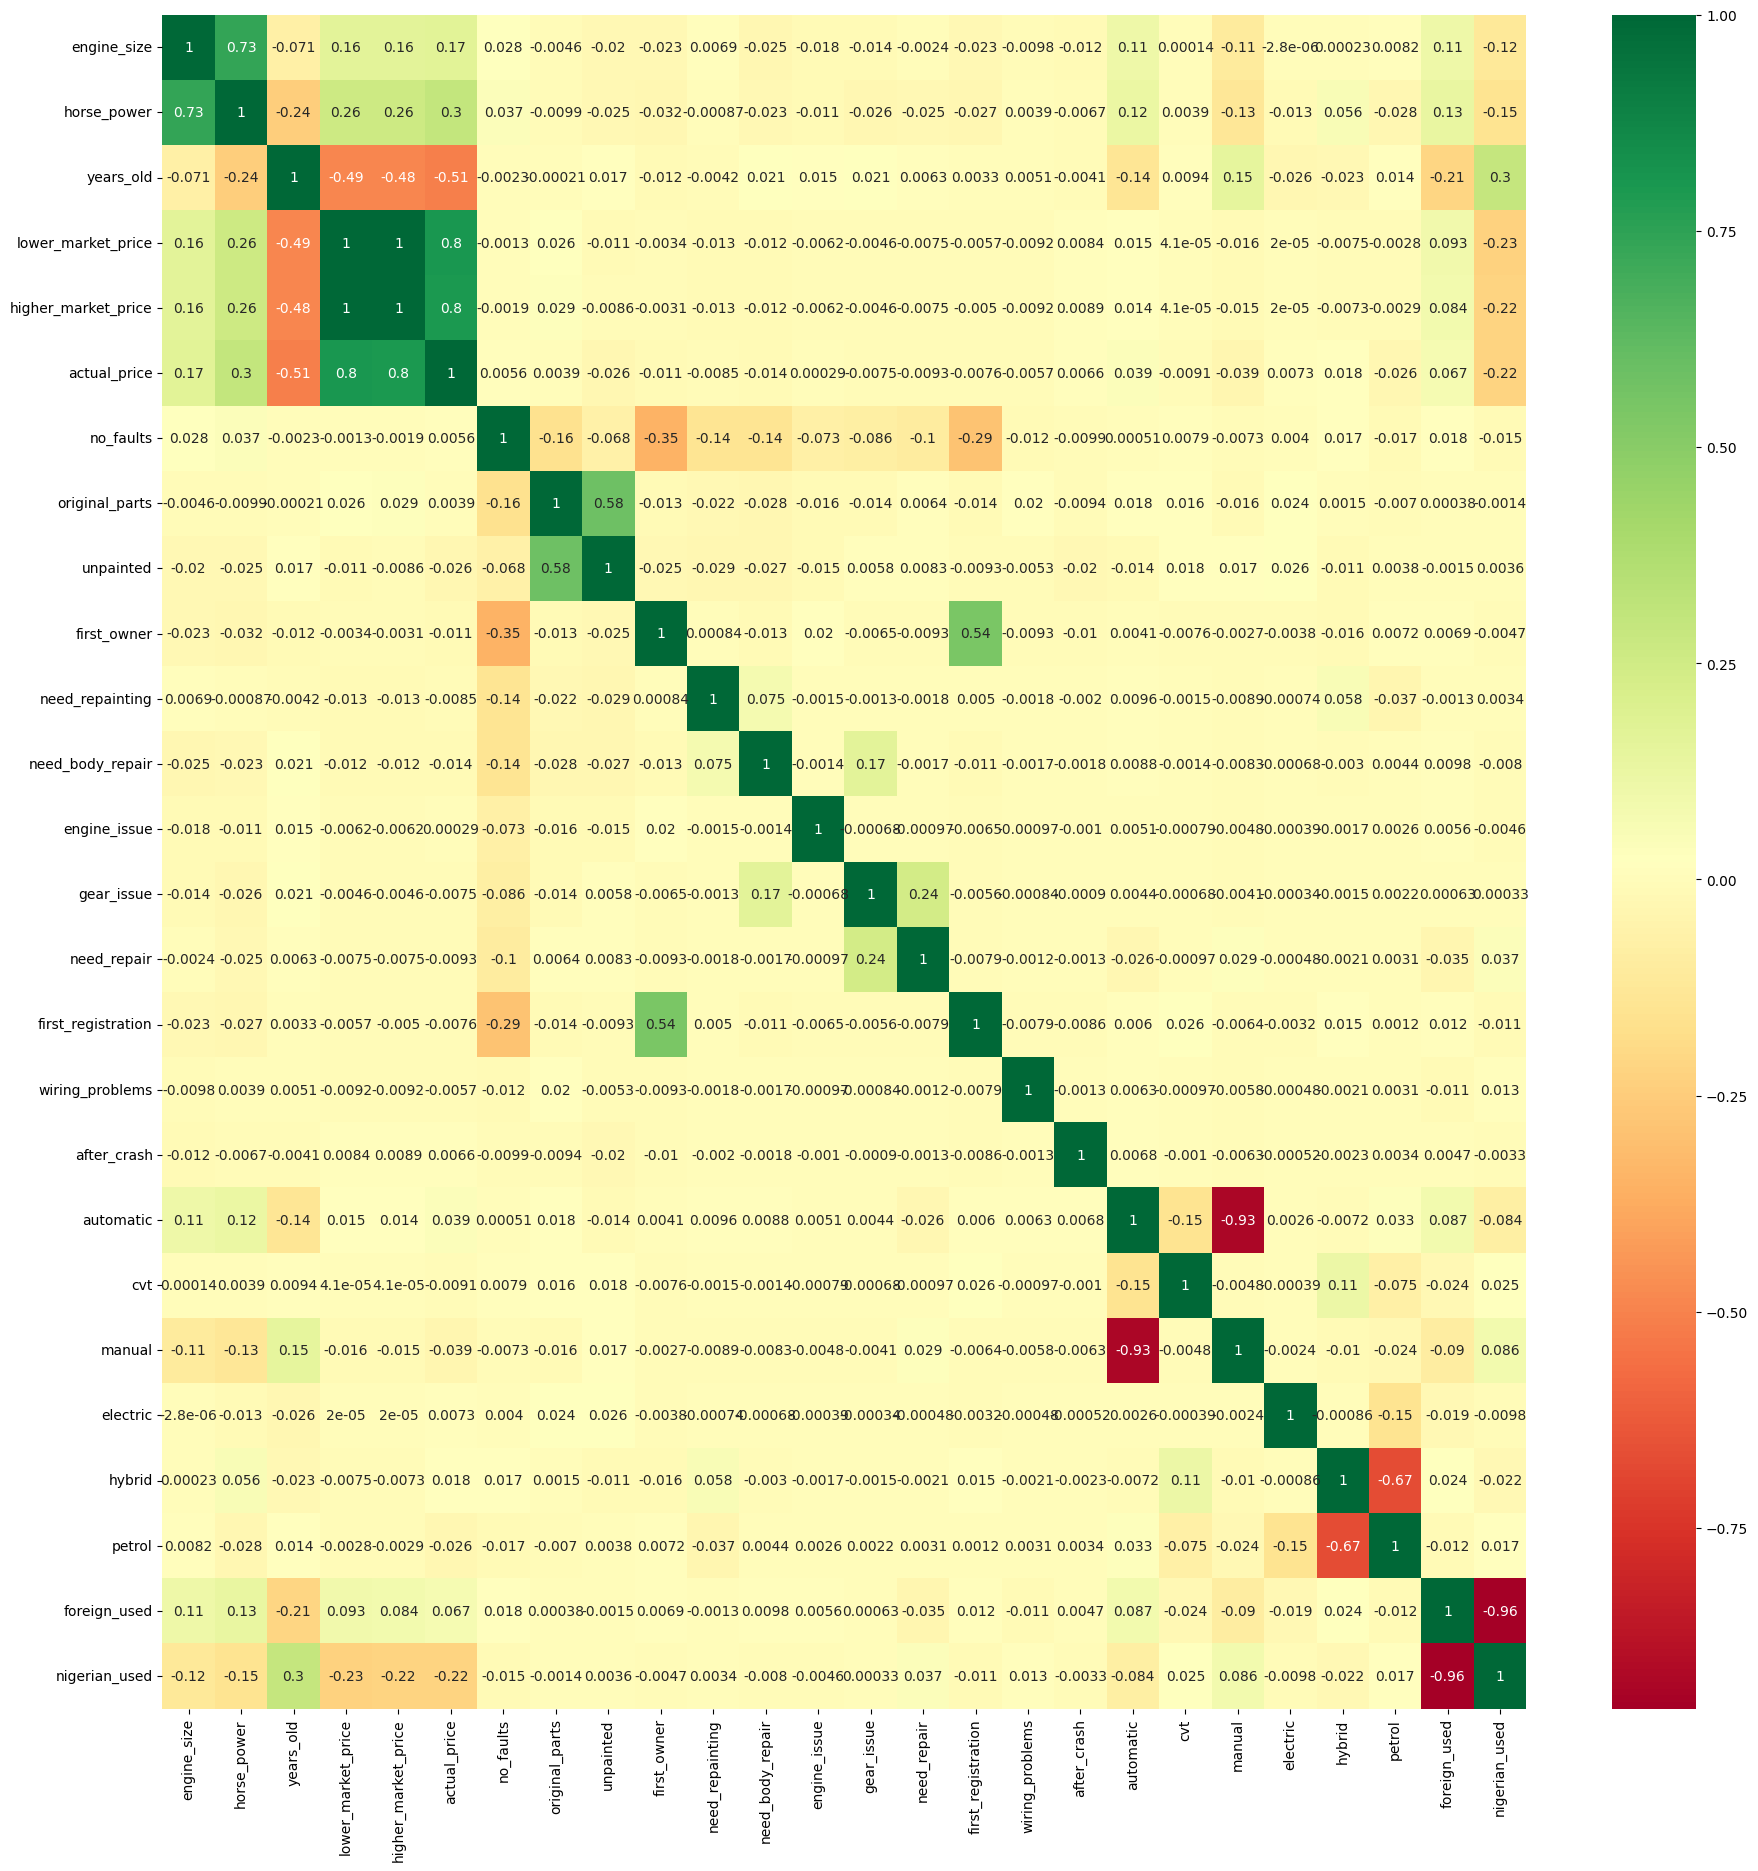

In [101]:
# heat map for correlations of features in dataset
plt.figure(figsize=(22, 22))
sns.heatmap(df[df.corr().index].corr(), annot=True, cmap="RdYlGn")

## 6. Separation of variables and data splitting

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = df.drop("actual_price", axis=1)
y = df["actual_price"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

## 7. Model Development

**A. Linear Regression**

In [105]:
from sklearn.linear_model import LinearRegression

In [108]:
linear = LinearRegression()
 
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))

0.6876995373544004


**B. Ridge Regression**

In [109]:
from sklearn.linear_model import Ridge

In [110]:
ridge = Ridge()
 
ridge.fit(X_train, y_train)
print(ridge.score(X_test, y_test))

0.6924604272387634


/home/praisegod/dev/car-price-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.4801e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


**C. Lasso Regression**

In [111]:
from sklearn.linear_model import Lasso

In [112]:
lasso = Lasso()
 
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))

0.6876846294229336


/home/praisegod/dev/car-price-prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.378e+17, tolerance: 2.287e+14
  model = cd_fast.enet_coordinate_descent(


**D. Decision Tree**

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
decision = DecisionTreeRegressor()
 
decision.fit(X_train, y_train)
print(decision.score(X_test, y_test))

0.7002785042323803


**E. Random Forest Regressor**

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
forest = RandomForestRegressor()
 
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.7777121347583644


**F. Gradient Boosting**

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
gradient = GradientBoostingRegressor()
 
gradient.fit(X_train, y_train)
gradient_pred = gradient.predict(X_test)
print(gradient.score(X_test, y_test))

0.8417832379709013


In [119]:
# gradient_pred

## 8. Performance Evaluation

In [120]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [121]:
# mae = mean_absolute_error(y_test, gradient_pred)
# mae

In [122]:
algorithms = [
    "Linear Regression", 
    "Ridge Regression", 
    "Lasso Regression", 
    "Decision Tree", 
    "Random Forest Regressor", 
    "Gradient Boosting"
]
models = [linear, ridge, lasso, decision, forest, gradient]

In [123]:
# evaluation metrics
scores = [model.score(X_test, y_test) for model in models]
mea = [mean_absolute_error(y_test, model.predict(X_test)) for model in models]
mse = [mean_squared_error(y_test, model.predict(X_test)) for model in models]
rmse = [np.sqrt(mean_squared_error(y_test, model.predict(X_test))) for model in models]
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models]

In [124]:
metrics = [scores, mea, mse, rmse, r2_scores]

In [125]:
metric_label = ["Score", "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R2_Score"]

In [126]:
metrics

[[0.6876995373544004,
  0.6924604272387634,
  0.6876846294229336,
  0.7002785042323803,
  0.7777121347583644,
  0.8417832379709013],
 [4248844.44413672,
  4239451.074268114,
  4248879.386674747,
  3316986.0330141205,
  2955429.9363574395,
  2843674.7746665734],
 [94662851129515.05,
  93219755571635.88,
  94667369942215.9,
  90849981757353.42,
  67378712528984.28,
  47957821334228.23],
 [9729483.600351822,
  9655037.833775477,
  9729715.820218796,
  9531525.678366156,
  8208453.723386901,
  6925158.578273008],
 [0.6876995373544004,
  0.6924604272387634,
  0.6876846294229336,
  0.7002785042323803,
  0.7777121347583644,
  0.8417832379709013]]

In [127]:
metric_df = pd.DataFrame(metrics, index=metric_label, columns=algorithms)

In [128]:
metric_df

,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest Regressor,Gradient Boosting
Score,6.876995e-01,6.924604e-01,6.876846e-01,7.002785e-01,7.777121e-01,8.417832e-01
Mean Absolute Error,4.248844e+06,4.239451e+06,4.248879e+06,3.316986e+06,2.955430e+06,2.843675e+06
Mean Squared Error,9.466285e+13,9.321976e+13,9.466737e+13,9.084998e+13,6.737871e+13,4.795782e+13
Root Mean Squared Error,9.729484e+06,9.655038e+06,9.729716e+06,9.531526e+06,8.208454e+06,6.925159e+06
R2_Score,6.876995e-01,6.924604e-01,6.876846e-01,7.002785e-01,7.777121e-01,8.417832e-01


In [129]:
metric_df.columns

Index(['Linear Regression', 'Ridge Regression', 'Lasso Regression',
       'Decision Tree', 'Random Forest Regressor', 'Gradient Boosting'],
      dtype='object')

In [130]:
metric_df.loc["Score"].values

array([0.68769954, 0.69246043, 0.68768463, 0.7002785 , 0.77771213,
       0.84178324])

In [134]:
# sns.histplot(data=metric_df, x=metric_df.iloc["Score"].values)

## 9. Save Model

#### Since, Gradient Boosting gave the best scores on the Training Dataset, then save `gradient` model.

In [132]:
import pickle

In [133]:
pickle.dump(gradient, open("../models/gradient_model.pkl", "wb"))